In [1]:
import pandas as pd
import json

In [2]:
import re

In [3]:
df = pd.read_csv("../all_comments.csv")
df.head()

,thread,id,message,raw_message,createdAt,author
0,8046248001,4939847379,"<p>Nando, como entro em contato com você?</p>","Nando, como entro em contato com você?",2020-06-03T23:40:37,"{'username': 'jhonatanpetronilho', 'about': ''..."
1,7701822403,4880700638,"<p>Muito bom o artigo! Valeu, Nando!</p>","Muito bom o artigo! Valeu, Nando!",2020-04-19T00:03:03,"{'username': 'messiashenriquevieirasilva', 'ab..."
2,7701822403,4903944082,<p>Show de bola esse artigo mano. vlw.</p><p>C...,"Show de bola esse artigo mano. vlw.\n\nCara, v...",2020-05-06T22:19:08,"{'username': 'renato_tavares', 'about': '', 'n..."
3,7701822403,4927284011,"<p>ótima matéria<br>mas, vamos supor que eu nã...","ótima matéria\nmas, vamos supor que eu não que...",2020-05-25T19:31:20,"{'username': 'rafaelrabitz', 'about': '', 'nam..."
4,7701822403,4927553246,"<p>é só não implementar as media queries, não?...","é só não implementar as media queries, não? Po...",2020-05-26T00:18:44,"{'username': 'nandovieira', 'about': '', 'name..."


In [4]:
# test_json = df['author'][0]

def formata_json(json_column):
    json_column = json_column.replace("'", '\"')
    json_column = json_column.replace("True", 'true')
    json_column = json_column.replace("False", 'false')
    json_column = json_column.replace("None", 'null')
    json_column = json_column.replace("\\", "")
    return json.loads(json_column)
# json.loads(test_json)

In [5]:
# NULL / Bad JSON
df = df.drop(index = [276, 277, 358, 461, 633, 1567, 1654, 2839])
df = df.reset_index(drop = True)

In [6]:
for i in range(len(df)):
    try:
        formata_json(df['author'][i])
    except:
        print(i)

In [7]:
df['author'] = df['author'].apply(formata_json)

In [8]:
for i in range(len(df)):
    try:
        df['author'][i]['url']
    except:
        print(i)

178
512
746
748


In [9]:
# NO URL
df = df.drop(index = [178, 512, 746, 748])
df = df.reset_index(drop = True)

In [10]:
df[df['author'] == 'Guest'].index

Index([], dtype='int64')

In [11]:
# GUESTS
df = df.drop(index = [ 208,  228,  230,  419,  483,  551,  715,  730,  735,  739,  771,  905,
        913,  946,  951,  997, 1047, 1190, 1196, 1207, 1220, 1319, 1365, 1601,
       1657, 1726])
df = df.reset_index(drop = True)

In [12]:
def strip_author(author_info):
    name = author_info['name']
    url = author_info['url']
    return name, url

In [13]:
authors, urls = zip(*df['author'].map(strip_author))
df['author'] = authors
df['author_url'] = urls

In [14]:
df.head(3)

,thread,id,message,raw_message,createdAt,author,author_url
0,8046248001,4939847379,"<p>Nando, como entro em contato com você?</p>","Nando, como entro em contato com você?",2020-06-03T23:40:37,Jhonatan Petronilho,
1,7701822403,4880700638,"<p>Muito bom o artigo! Valeu, Nando!</p>","Muito bom o artigo! Valeu, Nando!",2020-04-19T00:03:03,Messias Henrique Vieira Silva,
2,7701822403,4903944082,<p>Show de bola esse artigo mano. vlw.</p><p>C...,"Show de bola esse artigo mano. vlw.\n\nCara, v...",2020-05-06T22:19:08,Renato Tavares,


In [15]:
df[df['author'] == 'Yuri Malheiros']

,thread,id,message,raw_message,createdAt,author,author_url
2101,870739391,670752065,"<p>Tinha alguns plugins que eu nao conhecia, a...","Tinha alguns plugins que eu nao conhecia, agor...",2007-04-04T21:04:00,Yuri Malheiros,http://ylog.blogspot.com/
2102,870739391,670752012,"<p>Só uma dúvida rapida, o gedit demora muito ...","Só uma dúvida rapida, o gedit demora muito par...",2007-04-04T21:06:00,Yuri Malheiros,http://ylog.blogspot.com/
2106,870739391,670751912,<p>Eu tenho um tema para o gvim (tem um pouco ...,Eu tenho um tema para o gvim (tem um pouco de ...,2007-04-05T01:10:00,Yuri Malheiros,http://ylog.blogspot.com/
2150,870777213,670800292,"<p>Boa Nando, é assim que se faz!</p><p>Eu con...","Boa Nando, é assim que se faz!\n\nEu continuo ...",2007-04-04T15:33:00,Yuri Malheiros,http://ylog.blogspot.com/
2170,870566863,670525554,"<p>O Gnome tem seus defeitos, assim como o kde...","O Gnome tem seus defeitos, assim como o kde. D...",2007-04-03T13:12:00,Yuri Malheiros,http://ylog.blogspot.com/
2393,870573419,670530776,"<p>Embebida foi a pior, putz, se fosse pra esc...","Embebida foi a pior, putz, se fosse pra escrev...",2007-02-03T00:49:00,Yuri Malheiros,http://ylog.blogspot.com/
2438,870731303,670742563,<p>Esse nick que você diz é o login do digg?</p>,Esse nick que você diz é o login do digg?,2007-01-18T15:50:00,Yuri Malheiros,http://ylog.blogspot.com/
2440,870731303,670742663,<p>O meu nick la no digg é ymalheiros</p>,O meu nick la no digg é ymalheiros,2007-01-18T16:42:00,Yuri Malheiros,http://ylog.blogspot.com/
2505,870584565,670550909,<p>Já instalei o plugin aqui. Eu costumo segui...,Já instalei o plugin aqui. Eu costumo seguir a...,2007-01-04T01:26:00,Yuri Malheiros,http://ylog.blogspot.com/
2519,870784882,670810494,<p>Bem bacana essa daqui...</p><p>Nesse caso a...,Bem bacana essa daqui... \n\nNesse caso ainda ...,2006-12-09T01:48:00,Yuri Malheiros,http://ylog.blogspot.com/


In [ ]:
## TODO: Counter das palavras que Yuri falou

In [16]:
df.to_csv("comments_cleaned.csv", index = False)

## author // message estudo

In [17]:
from collections import Counter

In [18]:
messages_df = df[['author', 'raw_message']]
messages_df

,author,raw_message
0,Jhonatan Petronilho,"Nando, como entro em contato com você?"
1,Messias Henrique Vieira Silva,"Muito bom o artigo! Valeu, Nando!"
2,Renato Tavares,"Show de bola esse artigo mano. vlw.\n\nCara, v..."
3,Rafael Rabitz,"ótima matéria\nmas, vamos supor que eu não que..."
4,Nando Vieira,"é só não implementar as media queries, não? Po..."
...,...,...
2837,Peter Parker,"Cara, estou tentando estudar como fazer extens..."
2838,Walter Cruz,Isso porque o DOM é razoavelmente padrão em vá...
2839,Rodrigo Pires,Está dando muito certo... Conteúdo de primeira...
2840,Paulo Garcia,Fala Nando! Somente voltando no tempo sabemos ...


In [19]:
# autor que mais comentou
Counter(messages_df['author']).most_common(20)

[('Nando Vieira', 580),
 ('Walter Cruz', 31),
 ('Leonardo Faria', 21),
 ('Leonardo Faria Coelho', 17),
 ('Carlos Brando', 15),
 ('Alexandre', 13),
 ('Luiz Rocha', 12),
 ('Lucas Húngaro', 12),
 ('Thiago Antonius', 12),
 ('Lucas Caton', 11),
 ('Rodrigo Rosenfeld Rosas', 11),
 ('Ricardo Pacheco', 11),
 ('Cezinha Anjos', 10),
 ('Willian Fernandes', 10),
 ('Jeferson', 10),
 ('Leonardo Fontenelle', 10),
 ('Yuri Malheiros', 10),
 ('Yui', 9),
 ('Ronaldo', 9),
 ('Aguinelo Pedroso', 9)]

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import nltk
import pandas as pd
from nltk.stem import WordNetLemmatizer
from itertools import chain

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [21]:
stop_words = stopwords.words('portuguese')

In [22]:
count_vectorizer = CountVectorizer()
word_tokenizer = count_vectorizer.build_tokenizer()

In [23]:
def tokenize(text):
    try:
        tokens = word_tokenizer(text)
        tokens = [w for w in tokens if w not in stop_words]
        tokens = [WordNetLemmatizer().lemmatize(w) for w in tokens]
        return tokens
    except:
        return None

In [24]:
messages_df['tokens'] = messages_df['raw_message'].apply(tokenize)

/tmp/ipykernel_5526/2711617898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  messages_df['tokens'] = messages_df['raw_message'].apply(tokenize)


In [25]:
messages_df[messages_df['tokens'].isnull()]

,author,raw_message,tokens


In [26]:
messages_df['tokens']

0                                 [Nando, entro, contato]
1                      [Muito, bom, artigo, Valeu, Nando]
2       [Show, bola, artigo, mano, vlw, Cara, trabalha...
3       [ótima, matéria, vamos, supor, queira, configu...
4       [implementar, medium, query, Por, exemplo, dei...
                              ...                        
2837    [Cara, tentando, estudar, fazer, extensões, fe...
2838    [Isso, porque, DOM, razoavelmente, padrão, vár...
2839    [Está, dando, certo, Conteúdo, primeira, Traba...
2840    [Fala, Nando, Somente, voltando, tempo, sabemo...
2841           [Acabei, conhecer, blog, gostei, Parabéns]
Name: tokens, Length: 2842, dtype: object

## Post com mais comentários


In [27]:
from collections import Counter

In [28]:
# palavras mais recorrentes
Counter(list(chain.from_iterable(messages_df['tokens']))).most_common(20)   

[('Nando', 475),
 ('http', 358),
 ('fazer', 302),
 ('code', 298),
 ('post', 293),
 ('bom', 288),
 ('Eu', 280),
 ('usar', 255),
 ('pra', 232),
 ('Muito', 230),
 ('bem', 225),
 ('problema', 193),
 ('pode', 191),
 ('Não', 189),
 ('gem', 186),
 ('exemplo', 177),
 ('aqui', 173),
 ('sobre', 165),
 ('código', 164),
 ('ter', 163)]

In [29]:
# post com mais comentários
df['thread'].value_counts()

thread
870744729     50
870746842     50
1364754141    50
870767665     50
870578588     49
              ..
870580493      1
870770751      1
870570202      1
870562503      1
8046248001     1
Name: count, Length: 286, dtype: int64

In [30]:
df[df['thread'] == 870744729]

,thread,id,message,raw_message,createdAt,author,author_url
2590,870744729,670757993,"<p>Maravilha Nando, ótima explicação.</p><p>Co...","Maravilha Nando, ótima explicação.\n\nComo voc...",2006-11-22T14:46:00,Leandro Vieira Pinho,http://leandro.w3invent.com.br/
2591,870744729,670758036,"<p>Sou meio leigo no assunto, mais, me expliqu...","Sou meio leigo no assunto, mais, me explique m...",2006-11-29T16:19:00,marcus,
2592,870744729,670758088,<p>Marcus: imagine que você tenha exatamente a...,Marcus: imagine que você tenha exatamente a me...,2006-11-29T16:29:00,Nando Vieira,http://nandovieira.com
2593,870744729,670758136,"<p>Ah sim...agora entendi, muito boa a explica...","Ah sim...agora entendi, muito boa a explicação...",2006-12-17T19:06:00,Marcus,
2594,870744729,670758190,"<p>Oi Nando,</p><p>Acho que dá para re-escreve...","Oi Nando,\n\nAcho que dá para re-escrever essa...",2007-01-25T17:48:00,Arthur Furlan,http://arthurfurlan.com.br/blog
2595,870744729,670758234,"<p>Oi Nando,</p><p>Acho que dá para reescrever...","Oi Nando,\n\nAcho que dá para reescrever essa ...",2007-01-25T17:53:00,Arthur Furlan,http://arthurfurlan.com.br/blog
2596,870744729,670758274,<p>Ola!<br>sou novato em PHP e não sei como re...,Ola!\nsou novato em PHP e não sei como realiza...,2007-02-12T14:40:00,Daniel,
2597,870744729,670758317,"<p>Daniel, você pode dar um require, por exemp...","Daniel, você pode dar um require, por exemplo....",2007-02-12T18:51:00,Nando Vieira,http://nandovieira.com
2598,870744729,670758366,"<p>Olá!</p><p>""Talvez da próxima vez eles util...","Olá!\n\n""Talvez da próxima vez eles utilizem o...",2007-05-23T14:22:00,Diego,
2599,870744729,670758413,<p>boa dica!!!</p>,boa dica!!!,2007-07-20T04:45:00,Jaison,


In [64]:
famous_tokens_series = df[df['thread'] == 870744729]['raw_message'].apply(tokenize)
Counter(list(chain.from_iterable(famous_tokens_series))).most_common(5)

[('form', 17), ('formulário', 15), ('submit', 14), ('php', 11), ('código', 11)]

In [65]:
famous_tokens_series = df[df['thread'] == 870746842]['raw_message'].apply(tokenize)
Counter(list(chain.from_iterable(famous_tokens_series))).most_common(5)

[('Parabéns', 13),
 ('Nando', 11),
 ('iniciativa', 10),
 ('preço', 8),
 ('usuário', 7)]

In [68]:
famous_tokens_series = df[df['thread'] == 1364754141]['raw_message'].apply(tokenize)
Counter(list(chain.from_iterable(famous_tokens_series))).most_common(5)

[('j', 21), ('RequireJS', 15), ('http', 14), ('widget', 13), ('arquivos', 11)]

In [69]:
famous_tokens_series = df[df['thread'] == 870767665]['raw_message'].apply(tokenize)
Counter(list(chain.from_iterable(famous_tokens_series))).most_common(5)

[('pagamento', 24),
 ('dia', 15),
 ('tempo', 10),
 ('conta', 10),
 ('PagSeguro', 10)]

In [70]:
famous_tokens_series = df[df['thread'] == 870578588]['raw_message'].apply(tokenize)
Counter(list(chain.from_iterable(famous_tokens_series))).most_common(5)

[('vagrant', 80), ('gem', 71), ('in', 53), ('from', 43), ('local', 39)]

In [76]:
df[df['thread'] == 870578588]['raw_message']

401    Perfeito Nando.. Eu utilizo Mac, você recomend...
402    Adicionei uma seção com instruções sobre como ...
403    Excelente artigo. Me ajudará muito. E tenho ce...
404    Nando, não conhecia essa alternativa para wind...
405    Testado e aprovado, ta sendo muito útil já que...
406    S-E-N-S-A-C-I-O-N-A-L: Nando antes de mais nad...
407    Nando,\numa coisa que eu não entendi. Como eu ...
408    Fabio, depois de configurar a máquina do jeito...
409    Nando, como faço para executar esse box em out...
410    A melhor maneira é exportar a máquina virtual ...
411                       que comando uso para importar?
412    <code>vagrant box add &ltnome legível da image...
413                                                 vlw!
414    Fala Nando, tranquilo!?\nMan, você não instalo...
415    Não existe boa prática nesse caso. O Bundler p...
416                                  boa @tapajos:disqus
417    O que você quer dizer com "minhas próprias ins...
418    "Minhas próprias instala

## Implementar nuvem de palavras

In [45]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [46]:
# todas_palavras = ' '.join([texto for texto in df['tokens']])
todos_tokens = messages_df['tokens'].apply(lambda x: ' '.join(x))
todos_tokens = ' '.join(todos_tokens)
nuvem_palavras = WordCloud(width= 800, height= 500, max_font_size= 110, collocations = True).generate(todos_tokens)

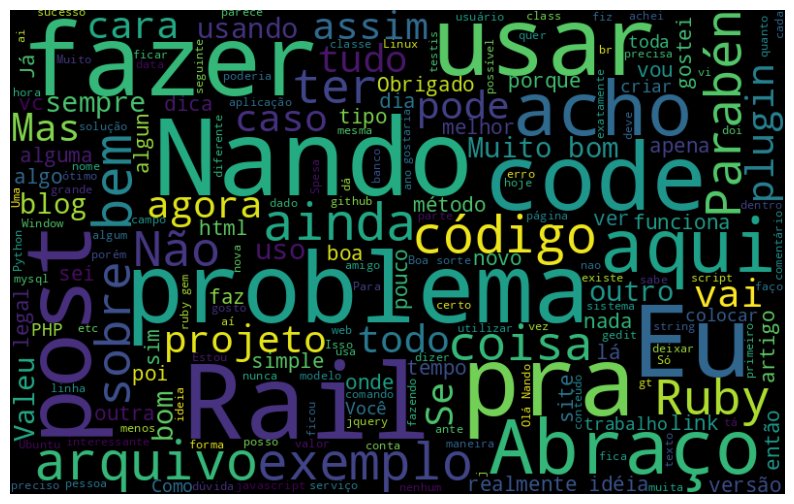

In [47]:
plt.figure(figsize=(10,7))
plt.imshow(nuvem_palavras, interpolation= 'bilinear')
plt.axis("off")
plt.show()